<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/Clasificaci%C3%B3n_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier

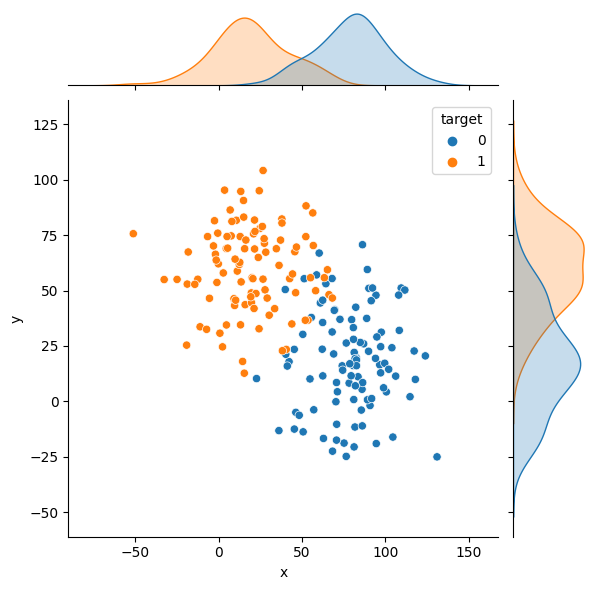

In [ ]:


muestras = 100

mediaX1 = 80
desvioX1 = 20

mediaY1 = 20
desvioY1 = 25

mediaX2 = 20
desvioX2 = 25

mediaY2 = 60
desvioY2 = 20


X1 = pd.Series(np.random.normal(loc=mediaX1, scale=desvioX1, size=muestras))
Y1 = pd.Series(np.random.normal(loc=mediaY1, scale=desvioY1, size=muestras))
Data1 = pd.DataFrame({'color':'red', 'target':0, 'x':X1, 'y':Y1})


X2 = pd.Series(np.random.normal(loc=mediaX2, scale=desvioX2, size=muestras))
Y2 = pd.Series(np.random.normal(loc=mediaY2, scale=desvioY2, size=muestras))
Data2 = pd.DataFrame({'color':'blue', 'target':1, 'x':X2, 'y':Y2})


Dataset_Multivariado = pd.concat([Data1, Data2], ignore_index=True, axis=0)

sns.jointplot(data=Dataset_Multivariado, x="x", y="y", kind="scatter", hue="target")

In [ ]:
from sklearn.model_selection import train_test_split


X= Dataset_Multivariado[['x','y']].to_numpy()
y= Dataset_Multivariado[['target']].to_numpy()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.5, random_state=42)

In [ ]:

clasificadorKNN = KNeighborsClassifier(n_neighbors=2)


clasificadorKNN.fit(X_train, y_train.ravel())



KNeighborsClassifier(n_neighbors=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



def generate_clf_KNN(k, X_train, y_train):
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    clasificadorKNN.fit(X_train, y_train.ravel())
    return clasificadorKNN

Training Accuracy = 0.925


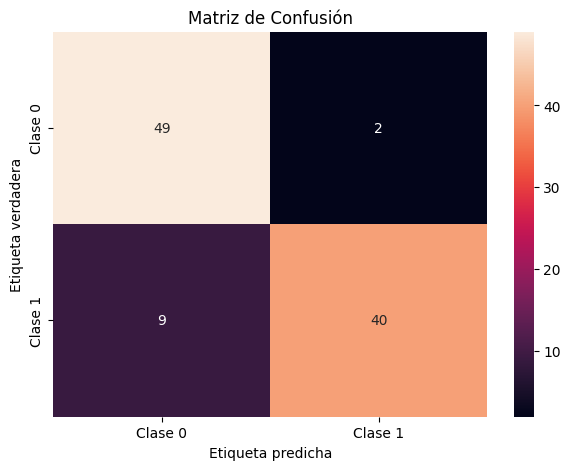

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.23, random_state=42)
clasificadorKNN2 = generate_clf_KNN(2)


y_pred = clasificadorKNN2.predict(X_test)
c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

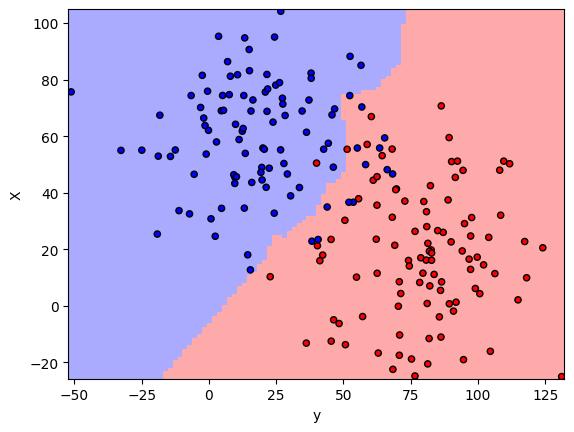

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_classification(X, y, clasificadorKNN):

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))


    Z = clasificadorKNN.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel('y')
    plt.ylabel('X')
    plt.axis('tight')
    plt.show()

visualize_classification(X, y, clasificadorKNN2)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_knn_metrics(X, y, clf_KNN, metric='accuracy', k_range=range(1, 10), test_size=0.2, average='macro'):

    metrics_functions = {
        'accuracy': accuracy_score,
        'precision': precision_score,
        'recall': recall_score,
        'f1': f1_score
    }

    if metric not in metrics_functions:
        raise ValueError(f"Métrica '{metric}' no reconocida. Elige entre: {', '.join(metrics_functions.keys())}.")

    if metric in ['precision', 'recall', 'f1']:
        metric_function = lambda y_true, y_pred: metrics_functions[metric](y_true, y_pred, average=average)
    else:
        metric_function = metrics_functions[metric]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    train_scores = []
    test_scores = []

    for k in k_range:
        knn = clf_KNN(n_neighbors=k)
        knn.fit(X_train, y_train.ravel())

        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)

        train_scores.append(metric_function(y_train, y_train_pred))
        test_scores.append(metric_function(y_test, y_test_pred))

    plt.figure(figsize=(6, 4))
    plt.plot(k_range, train_scores, label=f'Training {metric.capitalize()}')
    plt.plot(k_range, test_scores, label=f'Testing {metric.capitalize()}')

    plt.legend()
    plt.title(f'{metric.capitalize()} vs. Número de Vecinos')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()




### Accuracy (Exactitud):

Es la proporción de predicciones correctas entre el total de predicciones realizadas.
Es útil cuando las clases están aproximadamente equilibradas, es decir, no hay una clase que sea mucho más frecuente que las otras.
Si tu dataset tiene una distribución de clases relativamente equilibrada y estás interesado simplemente en la proporción global de predicciones correctas, la exactitud puede ser una buena métrica.

### Precision:

Es la proporción de predicciones positivas que fueron correctas.
Es útil cuando los falsos positivos son particularmente costosos o indeseables.
Si estás más preocupado por asegurarte de que las predicciones positivas del modelo sean correctas (y estás dispuesto a sacrificar algunos falsos negativos), la precisión es una métrica relevante.

### Recall (Sensibilidad):

Es la proporción de verdaderos positivos entre todos los casos positivos reales.
Es útil cuando los falsos negativos son particularmente costosos o indeseables.
Si estás más preocupado por identificar todos los casos positivos (aun a riesgo de tener algunos falsos positivos), el recall es una métrica relevante.

### F-score (específicamente F1-score):

Es la media armónica de precisión y recall, proporcionando un equilibrio entre ambas métricas.
Es útil cuando quieres equilibrar precisión y recall y no estás seguro de cuál métrica priorizar.
Es especialmente útil en situaciones donde las clases están desequilibradas.

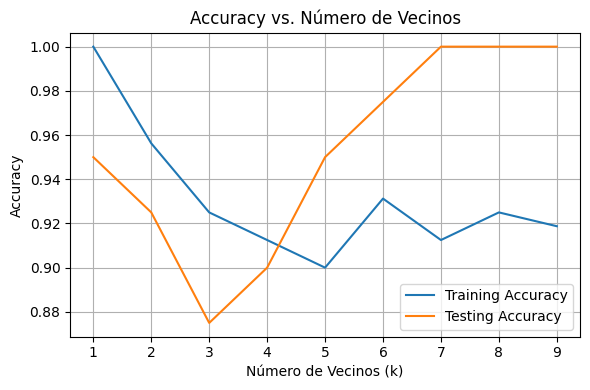

In [ ]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.2)

Se debe buscar

*   Mayor exactitud de prueba.
*   Brecha más pequeña entre exactitud de entrenamiento y prueba.




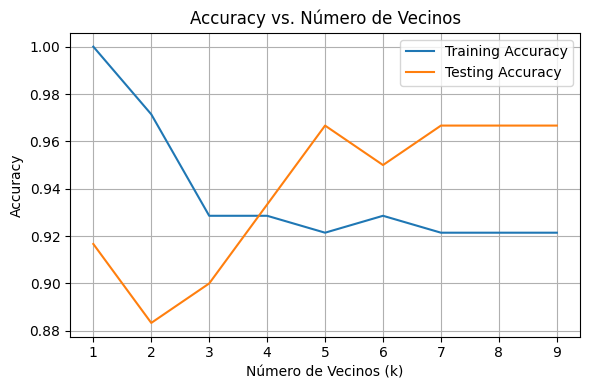

In [ ]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.3)

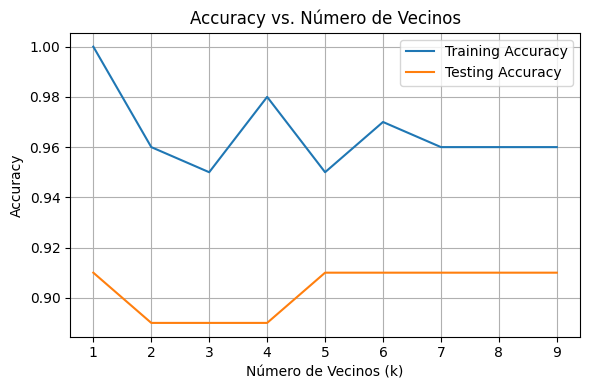

In [ ]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'accuracy',test_size=0.5)

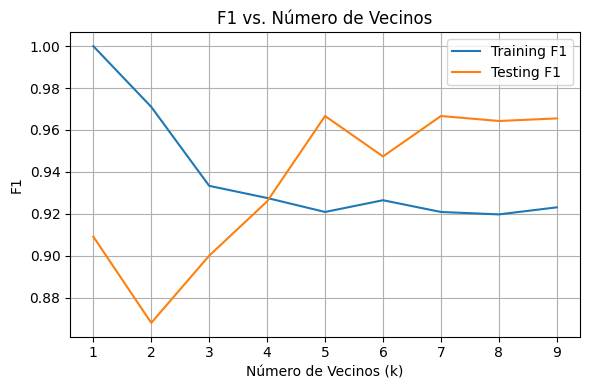

In [ ]:
plot_knn_metrics(X, y, KNeighborsClassifier, 'f1',test_size=0.3)

In [ ]:
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier(n_neighbors=5)


scores = cross_val_score(knn, X, y.ravel(), cv=10)


print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.9  0.9  0.85 0.9  0.85 0.95 0.85 0.95 0.95 0.95]
Media de los scores: 0.9049999999999999
Desviación estándar de los scores: 0.04153311931459036


In [ ]:
from sklearn.model_selection import KFold


cv = KFold(n_splits=5, shuffle=True, random_state=48)

scores = cross_val_score(knn, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.9   0.95  0.9   0.875 0.9  ]
Media de los scores: 0.905
Desviación estándar de los scores: 0.02449489742783176


EJEMPLO

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:

print("forma del dataset")
print(iris.data.shape)


n_samples, n_features = iris.data.shape


print("número de muestras del dataset")
print(n_samples)


print("número de características del dataset")
print(n_features)


counts = np.bincount(iris.target)


print("Balance de los datos:")
for i, count in enumerate(counts):
    print(f"{iris.target_names[i]}: {count}")

forma del dataset
(150, 4)
número de muestras del dataset
150
número de características del dataset
4
Balance de los datos:
setosa: 50
versicolor: 50
virginica: 50


## Ejemplo Iris


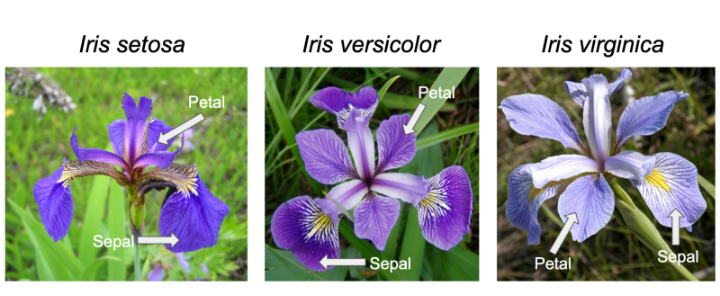

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df_iris['target'] = iris.target
df_iris['target_names'] = df_iris['target'].map({i:name for i, name in enumerate(iris.target_names)})
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


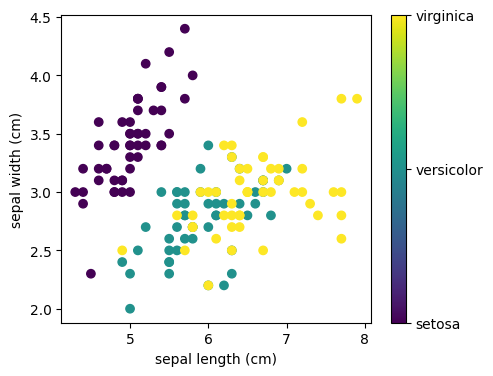

In [ ]:
from matplotlib import pyplot as plt


x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


plt.figure(figsize=(5, 4))
plt.scatter(df_iris.iloc[:, x_index], df_iris.iloc[:, y_index], c=df_iris['target'])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.show()


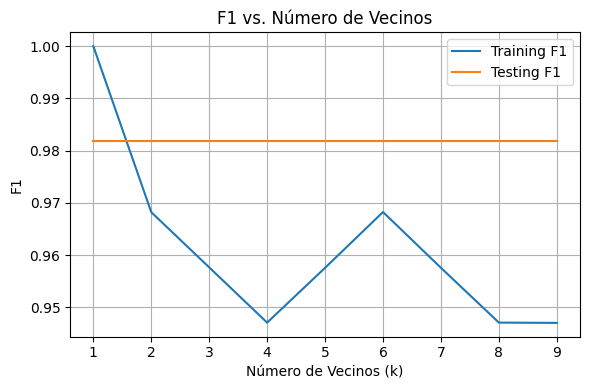

In [ ]:
X, y = iris.data, iris.target

plot_knn_metrics(X, y, KNeighborsClassifier, 'f1', average='macro', test_size=0.4)

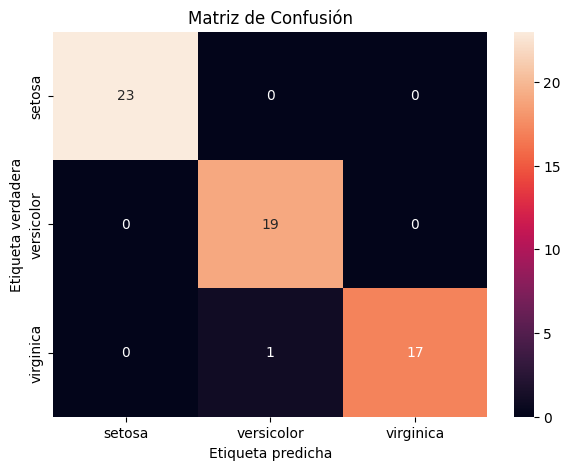


Accuracy: 0.9833333333333333
Precision (macro): 0.9833333333333334
Recall (macro): 0.9814814814814815
F1 Score (macro): 0.981929181929182


In [ ]:
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
clasificadorKNN6 = generate_clf_KNN(6,X_train, y_train)


y_pred = clasificadorKNN6.predict(X_test)
c = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(7,5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()
print("")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro')}")